## Convolutional Neural Networks (CNN)

Convolutional Neural Network kullanılacak ise input resim olmak zorundadır.

<br>
<img src="c2.png" align = "left" style="width:500px;height:200px"/>

CNN yapısı görselde görüldüğü gibidir. Şimdi özetle CNN'e ait katmanları açıklayayım.

<br>
<img src="c1.png" align = "left" style="width:500px;height:200px"/>

Yanda gördüğünüz şekli açıklayayım. Bir köşeğen resmi vardır. Bu resmin matris karşılığı hemen yan tarafında birim matris şeklinde gösterilmektedir. Bu matris input'tur. Bu matrisin üzerinde 2x2 boyutunda bir filtre dolaştırılmaktadır. Filtre içerisindeki sayılar weight'lerdir. Bu değerler CNN yapısı tarafından öğrenilir. Filtre, birim matris üzerinde konumlandırılır ve üst üste gelen değerler çarpılır. Sonrasında elde edilen tüm çarpım sonuçları toplanır. Elde edilen değer output matrisinin ilgili pikseline yazılır. Filtre 1 birim sağa ötelenerek tüm matris üzerinde dolanır. En sonunda output matrisinin tüm değerleri elde edilir. Kırmızı matriste görüldüğü üzere 2 değeri olan kısımlar siyahtır, 0 değeri olan kısımlar beyazdır. Aslında bu kırmızı matris, üstünde bulunan resmi ifade eder. 

Yani köşeğen ifadesi olan resme bir filtre uygulandı.Bu filtrenin uygulanması sonucunda bir feature elde edilmiştir. Bu feature, köşeğen resmidir. 

Bu anlatılanlar convolution layer kısmıdır.

Convolution layer ile resimden kenarlar, köşeler gibi basit geometrik şekiller elde edilir ve bunlara feature maps denir.

<br>
<img src="c3.png" align = "left" style="width:400px;height:100px"/>

Max Pooling ise yandaki görselde gördüğünüz şekildedir. Matris üzerinde saydam bir filtre gezdirilerek, filtrenin kapsadığı alanda bulunan maksimum değerin output matrisinde ilgili hücreye yazılması işlemidir. Bu işlem sonucunda elde edilen matrisler, pooling layer'daki matrislerdir. 

Pooling layer yapılma sebebi, overfitting'i engellemek içindir ve convolution layer'daki fetaure map'lerin sayısını azaltmak içindir. Feature map'lerin sayısının azaltılması ile ezberleme durumu engellenmiş olur. Ve bu işlem ile network'ün hızlı çalışmasına olanak sağlanmıştır.

<br>
<img src="c4.png" align = "left" style="width:300px;height:100px"/>

Flatten, elde edilen matrisi vektöre çevirme işlemidir. Yandaki görselde flatten işlemi bulunmaktadır. Vektöre çevrilme sebebi classification yapabilmek içindir. Çünkü CNN yapısında flatten aşamasına kadar feature extraction yani özellik çıkarımı yapılmıştır. Flatten ile dense layer'a çevirilir yani vektör haline getirilir.

<br>
<img src="c4.png" align = "left" style="width:300px;height:100px"/>

CNN yapısının yan tarafta gördüğünüz kısmında classification yapılacaktır. Yani resimden feature çıkarımı yapılmıştır. Feature'ler çıkarıldıktan sonra sınıflandırma yapılacaktır.

Daha sonrasında output layer'da kullanılan softmax aktivasyon fonksiyonu uygulanır. Softmax aktivasyon fonksiyonu multiclass classification için kullanılmaktadır. 

Dropout, overfitting'i engellemek için uygulanan regularization tekniğidir. Bunun anlamı, her bir iterasyonda farklı farklı olasılıklarla bazı nöronların kapatılması işlemidir. Meslea dropout=%50 dediğimizde, mesela 4 tane nöron var ise her bir iterasyonda nöronlardan 2 tanesi rastgele kapatılır, iptal edilir. Yani 2 tane nöron network yapısından çıkartılır.
Bu sayede her seferinde farklı farklı nöronlar yapıdan çıkartıldığı için overfitting durumunu engellemiş oluyoruz.

CNN uygulamasında 69905 adet resimden oluşan ve 131 tane farklı meyveden oluşan veri seti kullanılacaktır. 

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#Data'yı yükleyebilmek için:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

#Görselleştirme için:
import matplotlib.pyplot as plt

#Kaç tane class olduğunu öğrenmek için:
from glob import glob

import warnings
warnings.filterwarnings("ignore")

Preprocessing, data ile ilgili train'den önce yapılan işlemlere verilen isimdir.

https://www.kaggle.com/datasets/moltean/fruits linkinden bu çalışmada kullanılan veri setine ulaşabilirsiniz.

In [2]:
train_path = "C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/ConvolutionalNeuralNetworks/Training/"  
test_path = "C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/ConvolutionalNeuralNetworks/Test/"

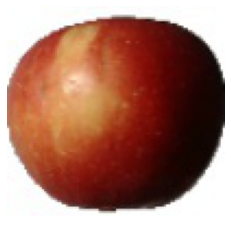

In [3]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off") #eksenlerin görünmesi engellenmiştir.
plt.show()

In [4]:
x = img_to_array(img)
x.shape

(100, 100, 3)

en ve boy bouytlarının 100 olduğu çıktıdan anlaşılmaktadır. Son parametredeki 3 değeri rgb olduğunu yani resmin renkli olduğunu ifade etmektedir.

training klasörü içerisindeki her bir klasör bir class'tır. Class adetini elde etmemizi sağlayacak kodu yazalım.

In [5]:
className = glob(train_path + '/*')

Training içerisinden class isimlerini okuyarak className listesinin içerisine yazdırdım. * ile tüm klasörlere erişilir.

In [6]:
className

['C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/ConvolutionalNeuralNetworks/Training\\Apple Braeburn',
 'C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/ConvolutionalNeuralNetworks/Training\\Apple Crimson Snow',
 'C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/ConvolutionalNeuralNetworks/Training\\Apple Golden 1',
 'C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/ConvolutionalNeuralNetworks/Training\\Apple Golden 2',
 'C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/ConvolutionalNeuralNetworks/Training\\Apple Golden 3',
 'C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın at

In [7]:
numberofClass = len(className)
numberofClass

131

In [8]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=x.shape))
#feature maps sayısı=32
#input resminin üzerinde dolaşarak convolution yapacak filtre boyutları (3,3) olarak ayarlandı.
#input shape'i belirlenmeden yollanamaz. Mesela 28x28 boyutunda resim yollanacaksa input_shape pearametresine 28x28 yazılmalıdır.

model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))  #1024 taneden %50'si kapatılmıştır. Böylelikler her seferinde 512 tanesi aktif olur.
model.add(Dense(numberofClass)) #output
#Output layer'ındaki nöron sayısı class sayısı kadar olur.
model.add(Activation("softmax"))

In [9]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

Softmax kullanıldığı multiclass olduğu anlamına gelir ve dolayısıyla loss parametresine "categorical_crossentropy" atanmıştır.

In [10]:
batch_size = 32 

Yukarıdaki kod ile her bir iterasyonda 32 tane resmin train edilmesi sağlanmıştır.

Şimdi de Apple Braeburn isimli meyveden kaç adet olduğuna bakalım.

In [11]:
a = glob(train_path + "Apple Braeburn/"+'/*')

In [12]:
len(a)

492

492 tane Apple Braeburn meyvesinden vardır. 

Her bir class'ta 492 tane resim olduğu varsayılırsa toplamda 492x131=64452 tane meyve resmi vardır. 64452 tane resim CNN'te eğitim için yeterli değildir. Dolayısıyla resimleri çoklayarak daha fazla resim elde etmeliyiz. Bu işleme Data Generation denir.

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                  shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3)

<br>
<img src="c6.png" align = "left" style="width:400px;height:200px"/>
<br><br>
shear_range parametresi ile resmin belli bir açı kadar çevrilmesi sağlanır. Bu işlemi yandaki görselde görmekteyiz.

horizontal_flip=True parametresi ile yatay bir şekilde 90 derece yan çevrilir. Yani random bir şekilde resimler sağa ya da sola çevrilir.

<br>
<img src="c7.png" align = "left" style="width:400px;height:200px"/>

Normalde 1 tane resim varken shear_range parametresi ile resmin 30 derece döndürülmüş halini elde ederek 2 tane resim oldu. Sonrasında horizontal_flip=True parametresi ile 3. resim elde edildi. 3 resmide yanda bulunmaktadır.

<br>
<img src="c8.png" align = "left" style="width:400px;height:200px"/>

Yanda gördüğünüz sol alttaki resim, orjinal resme zoom yapılması ile elde edilir. Sağ alttaki resim ise orjinal resme zoom out yapılması sonucunda elde edilir.

Bir data rescale ile normalize edilmiş bir şekilde eğitiliyorsa, testide normalize edilmiş şekilde yapılmalıdır. Yapılmaması durumunda oldukça kötü sonuçlar elde edilecektir.

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
                                                    train_path,
                                                    target_size=x.shape[:2], #(100,100,3) sahpe'sinden 100,100 kısmı alındı.
                                                    batch_size=batch_size,
                                                    color_mode = "rgb", #shape'deki 3 değeri alınmadığı içib burada rgb olduğunu belirttim.
                                                    class_mode="categorical" #Birden fazla class olduğu belirtilmiştir.
                                                    ) 

test_generator = test_datagen.flow_from_directory(
                                                    test_path,
                                                    target_size=x.shape[:2], #(100,100,3) sahpe'sinden 100,100 kısmı alındı.
                                                    batch_size=batch_size,
                                                    color_mode = "rgb", #shape'deki 3 değeri alınmadığı içib burada rgb olduğunu belirttim.
                                                    class_mode="categorical" #Birden fazla class olduğu belirtilmiştir.
                                                    ) 

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


Bir klasör içerisinde Training klasörü ve bu klasör içerisinde her bir class'a ait klasörler ve bu klasörler içerisinde de o class'a ait resimler bulunmaktadır. Bu sıralamada olduğu için keras flow_from_directory() metodu ile her bir meyveyi farklı sınıflara ayırır ve her bir meyvenin resimlerini de o sınıfların içerisine kendisi depoluyor.

In [22]:
hist = model.fit_generator(
                    generator=train_generator,  #fit etmek istenilen generator, train_generator'dur.
                    steps_per_epoch=1600//batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps = 800//batch_size
                    )

Epoch 1/10
50/50 [==============================] - 17s 345ms/step - loss: 3.2589 - accuracy: 0.1606 - val_loss: 2.8888 - val_accuracy: 0.2612
Epoch 2/10
50/50 [==============================] - 17s 342ms/step - loss: 2.7152 - accuracy: 0.2606 - val_loss: 2.0004 - val_accuracy: 0.4712
Epoch 3/10
50/50 [==============================] - 17s 345ms/step - loss: 2.2781 - accuracy: 0.3650 - val_loss: 1.6605 - val_accuracy: 0.5250
Epoch 4/10
50/50 [==============================] - 17s 337ms/step - loss: 1.8859 - accuracy: 0.4481 - val_loss: 1.5508 - val_accuracy: 0.5437
Epoch 5/10
50/50 [==============================] - 17s 335ms/step - loss: 1.6537 - accuracy: 0.4913 - val_loss: 1.1843 - val_accuracy: 0.6313
Epoch 6/10
50/50 [==============================] - 17s 338ms/step - loss: 1.4134 - accuracy: 0.5781 - val_loss: 0.9068 - val_accuracy: 0.7362
Epoch 7/10
50/50 [==============================] - 17s 338ms/step - loss: 1.2401 - accuracy: 0.6169 - val_loss: 0.8121 - val_accuracy: 0.7450

Kaç adet resim çoğaltılacağı belirtilmemişti. Dolayısıyla yukarıdaki kod bloğunda bulunan step_per_epoch=1600//batch_size parametresi ile bir epoch'da yapılması gereken batch sayısı belirtilmiştir. 1600//32 sonucunda 50 elde edilir ve dolayısıyla bir epoch boyunca 50 kez veri train edilir.

Mesela 400 tane resim olsun. batch_size değeride 12'dir. Tüm data 400//32=12 seferede train edilir. Her seferinde 32 resim koyularak toplamda 12 seferde train edilmiş oluyor.

step_per_epoch=1600//batch_size parametresi ile bir epoch'da yapılması gereken batch sayısının 50 olduğu belirtilmiştir. 50*batch_size=50*32=1660'dur. 1600 tane resim lazım fakat elimizde 400 tane resim var. Dolayısıyla 1600-400=1200 tane resim ImageDataGenerator metodu ile türetilmektedir.

In [23]:
#model save

model.save_weights("deneme.h5")

Yukarıdaki kod satırı ile model kaydedilmiştir.

Elde ettiğimiz verileri görselleştirelim.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


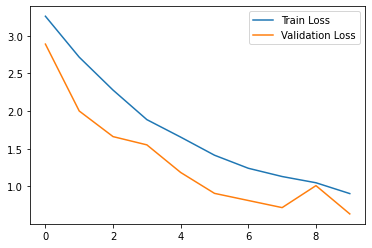

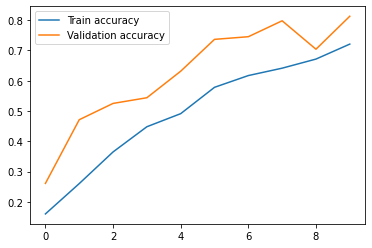

In [24]:
# model evalution

print(hist.history.keys())
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend() #label'ların görünmesi içindir.
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"], label="Train accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation accuracy")
plt.legend() #label'ların görünmesi içindir.
plt.show()

Loss ve Accuracy train seti üzerinde yapılan şeylerdir. validation loss ve validation accuracy ise test seti üzerinde elde edilen sonuçlardır. 

In [25]:
#save history

import json
with open("deneme.json","w") as f:
    json.dump(hist.history,f)

History'i kaydedip, daha sonra tekrardan yükleyebilmemiz mümkündür. Yukarıdaki kod bloğu ile history'in kaydedilmesi işlemi gerçekleştirilmiştir.

Şimdi de history'i yükleyelim.

In [26]:
#Load history

import codecs
with codecs.open("deneme.json","r", encoding="utf-8") as f:
    h = json.loads(f.read())

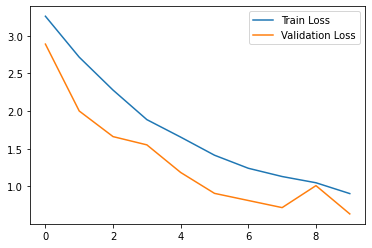

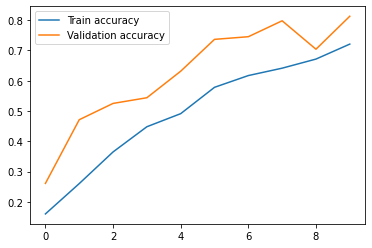

In [27]:
plt.plot(h["loss"], label="Train Loss")
plt.plot(h["val_loss"], label="Validation Loss")
plt.legend() #label'ların görünmesi içindir.
plt.show()

plt.figure()
plt.plot(h["accuracy"], label="Train accuracy")
plt.plot(h["val_accuracy"], label="Validation accuracy")
plt.legend() #label'ların görünmesi içindir.
plt.show()